## 4. Saddle Node Bifurcation

In [0]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

\begin{align*}
\dot{u} = \mu - u^2
\end{align*}

### a)

![sketch 1](https://raw.githubusercontent.com/ManshaP/CCEES/master/exercise_1/4_a_1.jpg)

### b)

In [0]:
def saddle_node_bifurcation(u, t=None, mu=1.):    
    return (mu - u**2)

def u_fix(mu):
    if mu >= 0:
        u_i = [np.sqrt(mu), -np.sqrt(mu)]
    else:
        u_i = []
        
    stability = []
    for u in u_i:
        deriv = -2 * u
        if deriv < 0:
            stability.append(-1)
        elif deriv > 0:
            stability.append(1)
        else:
            stability.append(0)
    
    return list(map(list, zip(*[u_i, stability])))

In [0]:
t_range = np.linspace(0, 1, 1000)
mus = [-1, 0, 1]
u0s = np.linspace(-6, 6, 90)
scenario = {}
for mu in mus:
    scenario[mu] = {}
    for u in u0s:
        u0 = (u,)
        sol = solve_ivp(lambda t, y: saddle_node_bifurcation(y, t, mu), t_span=(t_range[0],t_range[-1]), y0=u0, t_eval=t_range)
        scenario[mu][u0] = (sol.y[0], sol.t)

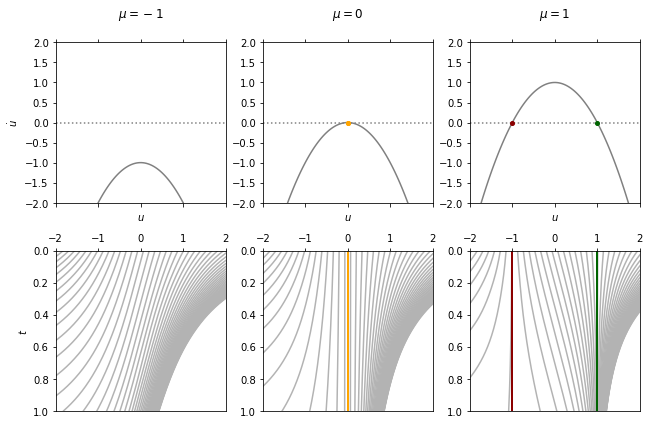

In [0]:
axs = {}
n_mu = len(mus)
colors = {-1:'darkgreen', 0:'orange', 1:'darkred'}
u_range = np.linspace(-2, 2, 100)

fig = plt.figure()

for i, mu in enumerate(mus):
    axs[(mu,'t')] = plt.subplot2grid((2, n_mu), (1, i))
    axs[(mu,'u')] = plt.subplot2grid((2, n_mu), (0, i))
    axs[(mu,'u')].set_title(r'$\mu={}$'.format(mu), pad=25)
    
for mu, solutions in scenario.items():
    fix_points = u_fix(mu)
    
    axs[(mu,'u')].plot(u_range, saddle_node_bifurcation(u_range, mu=mu), color='0.5')
    axs[(mu,'u')].plot((u_range[0], u_range[-1]), (0, 0), color='0.5', linestyle=':')
    axs[(mu,'u')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'u')].set_ylim(-2, 2)
    
    for n0, solution in solutions.items():
        axs[(mu,'t')].plot(*solution, label=r'$n_0={}$'.format(n0), color='0.7')
        
    for fix, stab in fix_points:
        c = colors[stab]
        axs[(mu,'t')].plot((fix, fix), (t_range[0], t_range[-1]), color=c, linewidth=2)
        axs[(mu,'u')].plot(fix, 0, marker='.', color=c, markersize=8)
        
    axs[(mu,'t')].set_xlim(u_range[0], u_range[-1])
    axs[(mu,'t')].set_ylim(0, t_range[-1])
    axs[(mu,'t')].invert_yaxis()
    axs[(mu,'u')].set_xlabel(r'$u$', labelpad=10)
    axs[(mu,'t')].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    axs[(mu,'u')].tick_params(top=True, labeltop=False, bottom=True, labelbottom=False)
    
axs[(mus[0],'t')].set_ylabel(r'$t$')
axs[(mus[0],'u')].set_ylabel(r'$\dot{u}$')

fig.set_size_inches(n_mu*3, 6)
fig.tight_layout()
plt.show()